# Wardiansyah Fauzi Abdillah | 51421514 | 3IA01 | Sistem Prediksi Dengan Model CNN

## Import Library

In [ ]:
# Mengimpor library yang diperlukan
import os  # Modul untuk interaksi dengan sistem operasi
import pandas as pd  # Modul untuk manipulasi data menggunakan DataFrame
import numpy as np  # Modul untuk operasi numerik
import warnings  # Modul untuk mengabaikan peringatan yang tidak diperlukan

# Mengabaikan peringatan untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengimpor matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimpor train_test_split dari scikit-learn untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Mengimpor library Keras untuk membangun model jaringan saraf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard  # Callback untuk menambahkan TensorBoard ke model

# Menetapkan jumlah kelas dan epoch
num_classes = 10
epochs = 20


## Load Data

In [ ]:
# Melihat direktori aktif
os.getcwd()

'/content'

In [ ]:
# Melihat isi direktori
!ls

fashion-mnist_test.csv	fashion-mnist_train.csv  fashion-mnist.zip  sample_data


In [ ]:
# unzip file dataset yang berisi file train dan test
!unzip fashion-mnist.zip

Archive:  fashion-mnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# mengisi setiap variable train dan test dengan file csv yang telah dibacakan, sep ="," berguna untuk menghilangkan separator koma
train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

In [ ]:
# Membaca header dataset
train_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [ ]:
# Mengonversi data pelatihan dan pengujian menjadi array numpy dengan tipe data float32
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')


In [ ]:
# Normalisasi dan pemisahan fitur dan label untuk data pelatihan
x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

# Normalisasi dan pemisahan fitur dan label untuk data pengujian
x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]


In [ ]:
# Pembagian data pelatihan menjadi data pelatihan dan validasi
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)


## Data Visualization

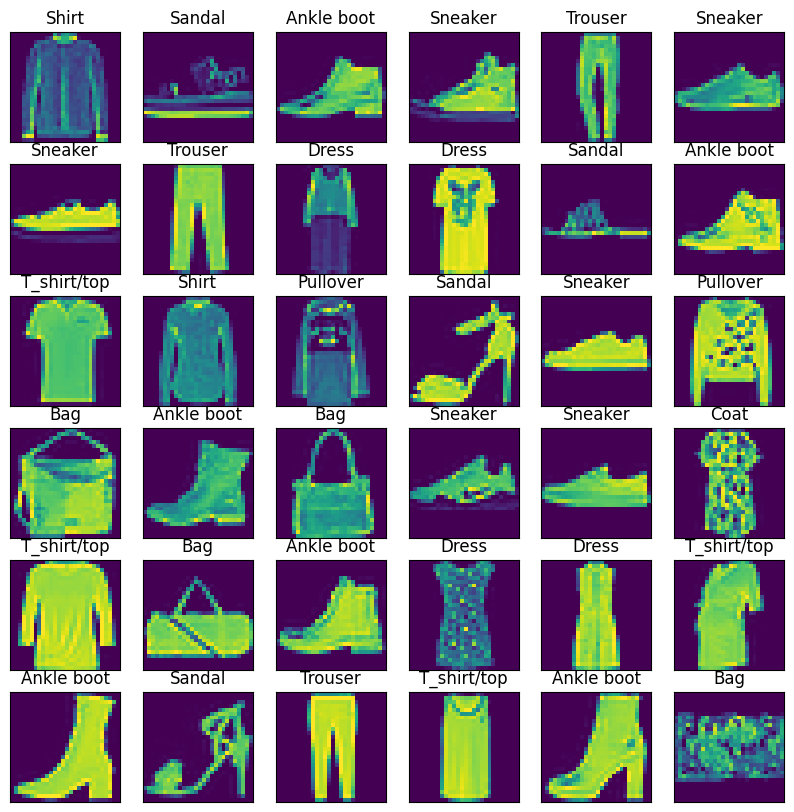

In [ ]:
# Menentukan nama kelas untuk digunakan dalam label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Membuat plot dengan ukuran 10x10
plt.figure(figsize=(10, 10))

# Menampilkan 36 sampel gambar dari kelas pelatihan dengan label yang sesuai
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Menampilkan gambar dan menyesuaikan label sesuai dengan indeks kelas
    plt.imshow(x_train[i].reshape((28, 28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])

# Menampilkan plot
plt.show()


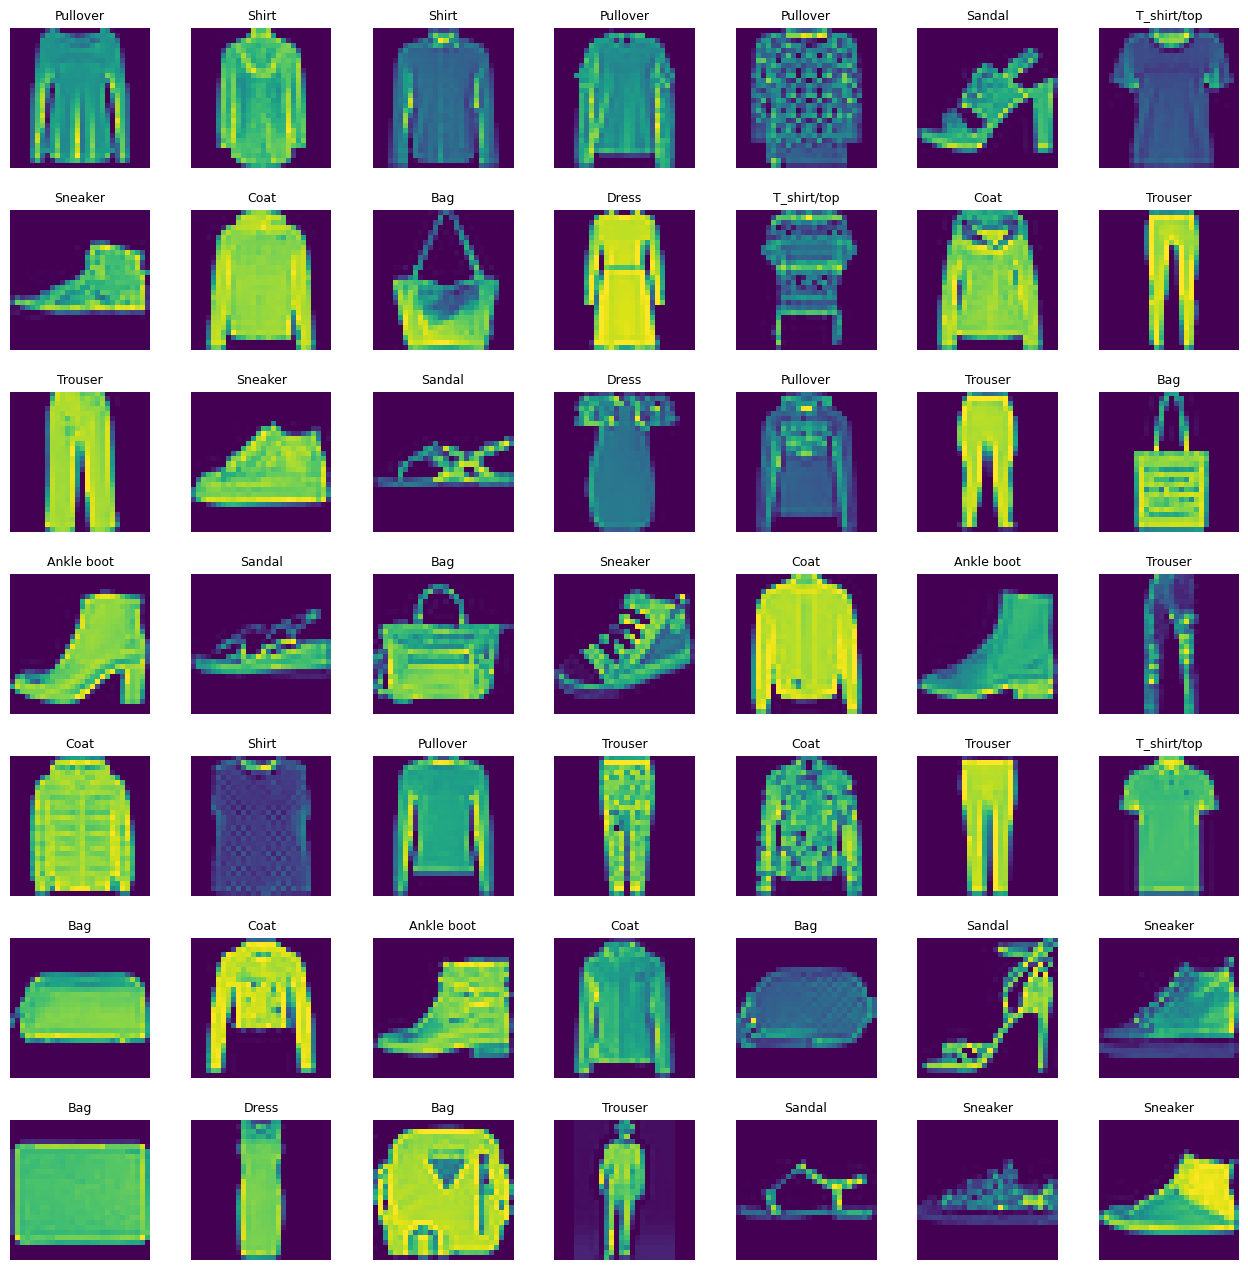

In [ ]:
# Menentukan jumlah grid baris dan kolom untuk plot
W_grid = 7
L_grid = 7

# Membuat subplots dengan ukuran sesuai dan meratakan matriks 7x7 menjadi array 1 dimensi
fig, axes = plt.subplots(L_grid, W_grid, figsize=(16, 16))
axes = axes.ravel()  # Meratakan matriks 7x7 menjadi array 1 dimensi
n_train = len(train_data)  # Mendapatkan panjang data pelatihan

# Memilih angka acak dari 0 hingga n_train
for i in np.arange(0, W_grid * L_grid):  # Membuat variabel dengan jarak yang merata

    # Memilih angka acak
    index = np.random.randint(0, n_train)
    # Membaca dan menampilkan gambar dengan indeks yang dipilih
    axes[i].imshow(train_data[index, 1:].reshape((28, 28)))
    label_index = int(train_data[index, 0])
    axes[i].set_title(class_names[label_index], fontsize=9)
    axes[i].axis('off')

# Menyesuaikan ruang antar subplot secara vertikal
plt.subplots_adjust(hspace=0.3)

## Create and Train Model

In [ ]:
# Menentukan ukuran baris dan kolom gambar, ukuran batch, dan bentuk gambar
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [ ]:
# Mengubah bentuk gambar pada set pelatihan, pengujian, dan validasi
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

In [ ]:
# Membangun model Convolutional Neural Network (CNN)
# Layer konvolusi pertama dengan 32 filter, kernel size 3x3, dan fungsi aktivasi ReLU
# Input shape sesuai dengan dimensi gambar yang digunakan (28x28 piksel, 1 channel)
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape),
    # Layer pooling untuk mengecilkan dimensi output menjadi 14x14
    MaxPooling2D(pool_size=2),
    # Dropout layer untuk menghindari overfitting
    Dropout(0.2),
    # Flatten layer untuk menyapu (flatten) output menjadi vektor 1 dimensi
    Flatten(),
    # Dense layer dengan 32 unit dan fungsi aktivasi ReLU
    Dense(32, activation='relu'),
    # Dense layer output dengan 10 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax
    Dense(10, activation='softmax')
])


In [ ]:
# Mengkompilasi model CNN dengan menggunakan sparse categorical crossentropy sebagai fungsi kerugian,
# Adam optimizer dengan learning rate 0.001, dan metrik akurasi
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Melatih model CNN menggunakan data latih (x_train, y_train) dengan batch size 4096, selama 75 epoch,
# dengan data validasi (x_validate, y_validate)
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate, y_validate),
)
# Melatih model Convolutional Neural Network (CNN) menggunakan fungsi fit().
# x_train: data gambar latih
# y_train: label gambar latih
# batch_size: jumlah sampel per pembaharuan gradien
# epochs: jumlah iterasi pada data latih
# verbose: menampilkan progres latihan (1 untuk tampil, 0 untuk tidak)
# validation_data: data yang digunakan untuk validasi selama pelatihan

Epoch 1/75
12/12 [==============================] - 13s 96ms/step - loss: 1.6959 - accuracy: 0.4701 - val_loss: 1.0312 - val_accuracy: 0.7060
Epoch 2/75
12/12 [==============================] - 1s 49ms/step - loss: 0.8250 - accuracy: 0.7390 - val_loss: 0.6678 - val_accuracy: 0.7704
Epoch 3/75
12/12 [==============================] - 1s 50ms/step - loss: 0.6274 - accuracy: 0.7830 - val_loss: 0.5698 - val_accuracy: 0.7973
Epoch 4/75
12/12 [==============================] - 1s 50ms/step - loss: 0.5502 - accuracy: 0.8079 - val_loss: 0.5150 - val_accuracy: 0.8179
Epoch 5/75
12/12 [==============================] - 1s 50ms/step - loss: 0.5002 - accuracy: 0.8266 - val_loss: 0.4800 - val_accuracy: 0.8301
Epoch 6/75
12/12 [==============================] - 1s 50ms/step - loss: 0.4696 - accuracy: 0.8373 - val_loss: 0.4519 - val_accuracy: 0.8430
Epoch 7/75
12/12 [==============================] - 1s 49ms/step - loss: 0.4471 - accuracy: 0.8439 - val_loss: 0.4310 - val_accuracy: 0.8487
Epoch 8/75
1

## Graphics

Text(0.5, 1.0, 'Train - Accuracy')

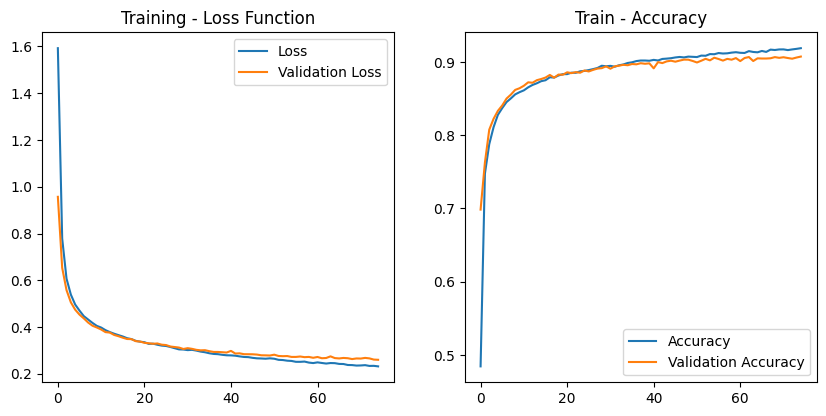

In [ ]:
# Menampilkan grafik kurva loss function dan akurasi pada data latih dan validasi
# untuk memonitor performa pelatihan model CNN.
plt.figure(figsize=(10, 10))

# subplot(2, 2, 1): Menampilkan grafik kurva loss function (training dan validation).
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

# subplot(2, 2, 2): Menampilkan grafik kurva akurasi (training dan validation).
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Evaluate Model

In [ ]:
# Evaluasi performa model pada data uji dan mencetak loss serta akurasi.
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2591
Test Accuracy : 0.9088


## Plot Data

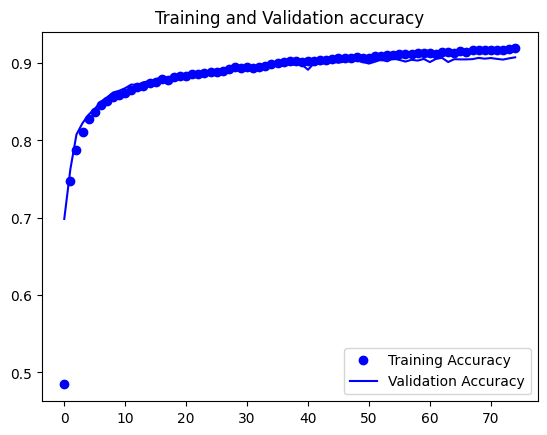

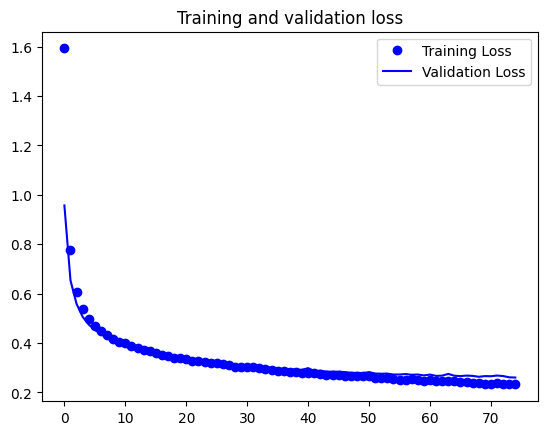

In [ ]:
# Visualisasi akurasi dan loss pada data latih dan validasi selama pelatihan model.
import matplotlib.pyplot as plt
%matplotlib inline

# Mengambil nilai akurasi dan loss dari history model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plotting grafik akurasi
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# Plotting grafik loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

In [ ]:
# Mendapatkan prediksi untuk data uji
predicted_probabilities = cnn_model.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Mengonversi y_true menjadi array NumPy untuk penanganan yang konsisten
y_true = np.array(test_df.iloc[:, 0])

# Kode lainnya tetap sama
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# Melakukan import classification_report dari sklearn.metrics
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]

# Menampilkan laporan klasifikasi
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.87      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.87      0.85      0.86      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.78      0.70      0.74      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Prediction Result

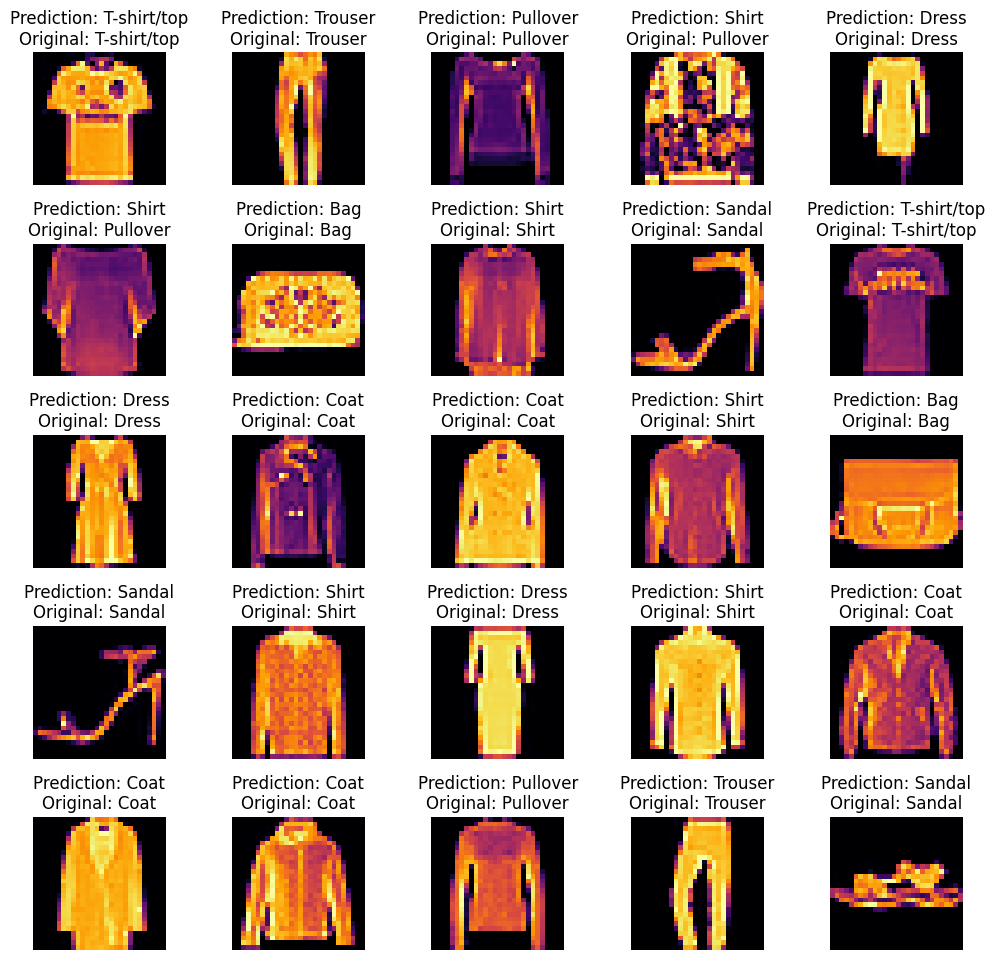

In [ ]:
# Labels untuk kelas
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Mengatur baris dan kolom untuk tampilan gambar
L = 5
W = 5

# Membuat subplot
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

# Menampilkan gambar dan prediksi
for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='inferno')  # Asumsi gambar berwarna abu-abu
    axes[i].set_title(f"Prediksi: {labels[predicted_classes[i]]}\nAsli: {labels[y_test[i]]}")
    axes[i].axis('off')

# Mengatur jarak antar subplot
plt.subplots_adjust(wspace=0.5)
plt.show()